In [58]:
import numpy as np
import pandas as pd

In [59]:
df = pd.read_csv('../Data/heart.csv')

In [60]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
# using the above data we have to predict, whether the target is 1 or 0 (heart disease or not)

In [62]:
df.info()
# all dtype of columns are of int and only one is of float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [63]:
df.isna().sum()
# no null values found

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [64]:
print(df.duplicated().sum())
print(df.shape)

1
(303, 14)


In [65]:
df.drop_duplicates(inplace=True)

In [66]:
df.shape

(302, 14)

In [67]:
# all the variables are of numerical dtype
# now we need to do univariate analysis and bivariate analysis

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

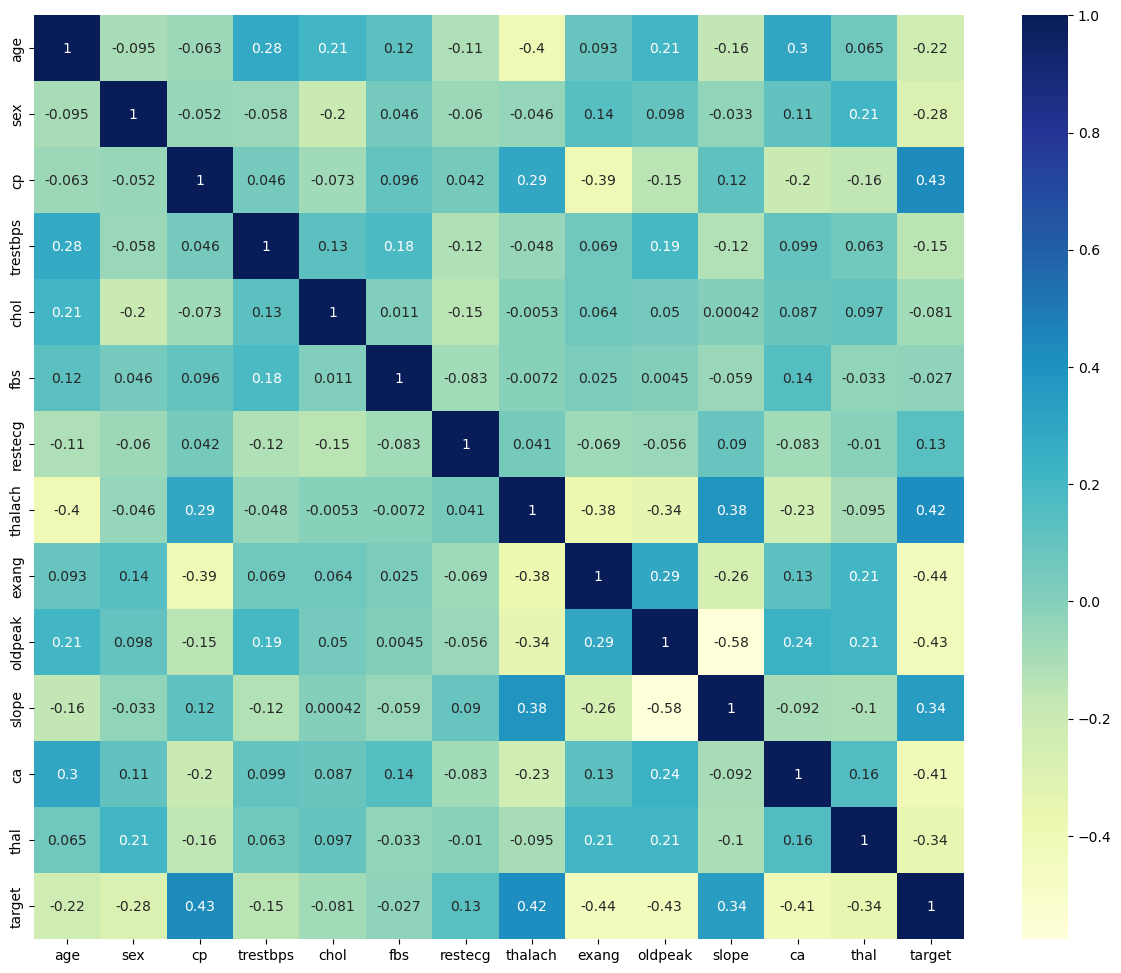

In [69]:
corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, cmap='YlGnBu', annot=True)
plt.show()

In [70]:
# plot histograms for each columns
# extract the continuous variables and discrete variables
for col in df.columns:
    print(col,df[col].value_counts().nunique())

age 16
sex 2
cp 4
trestbps 16
chol 6
fbs 2
restecg 3
thalach 10
exang 2
oldpeak 15
slope 3
ca 5
thal 4
target 2


In [71]:
# we can set a parameter here, if the value counts are above 7 then they are categorized as continuous
# variables
cont=[]
disc=[]
for col in df.columns:
    if df[col].value_counts().nunique()>7:
        cont.append(col)
    else:
        disc.append(col)

print(cont,disc,sep='\n')

['age', 'trestbps', 'thalach', 'oldpeak']
['sex', 'cp', 'chol', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


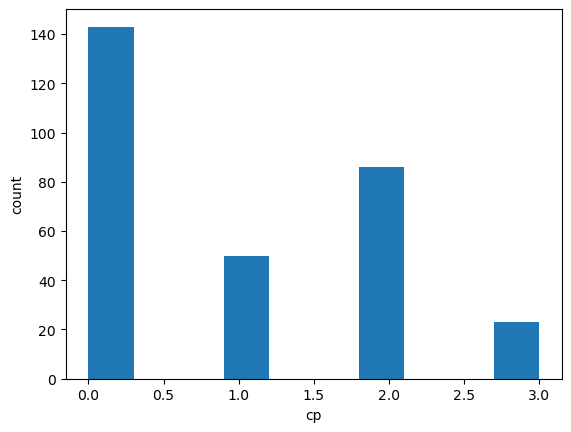

In [72]:
# Distribution of discrete variables
plt.hist(df[disc[1]])
plt.xlabel('cp')
plt.ylabel('count')
plt.show()

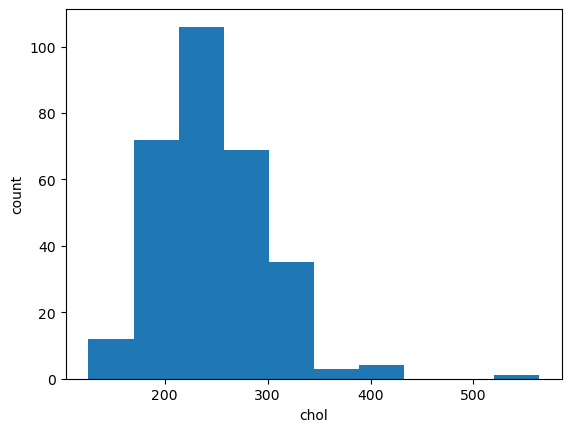

In [73]:
plt.hist(df[disc[2]])
plt.xlabel('chol')
plt.ylabel('count')
plt.show()

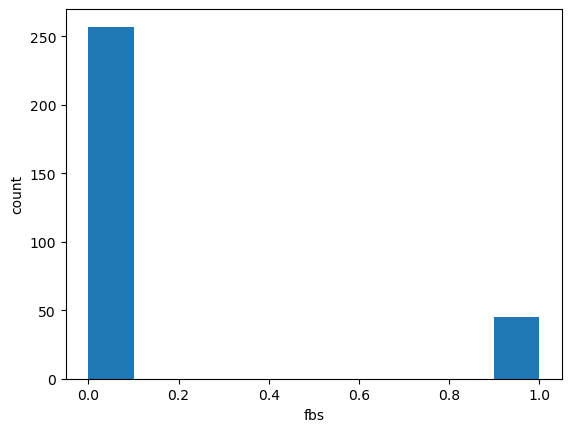

In [74]:
plt.hist(df[disc[3]])
plt.xlabel('fbs')
plt.ylabel('count')
plt.show()

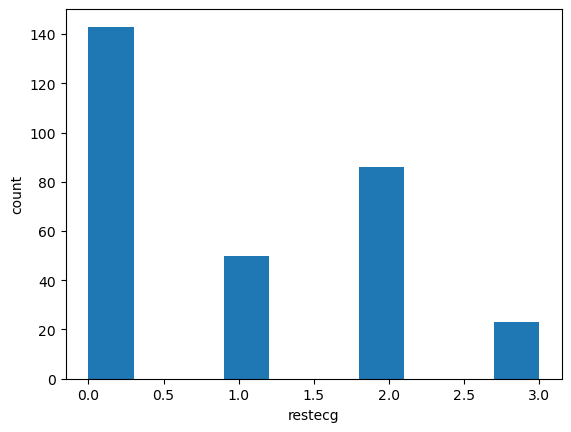

In [75]:
plt.hist(df[disc[1]])
plt.xlabel('restecg')
plt.ylabel('count')
plt.show()

<Axes: ylabel='Density'>

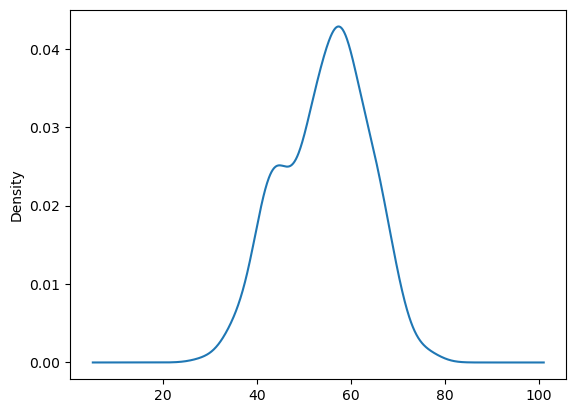

In [76]:
# Distribution of continuous variables

df[cont[0]].plot(kind='kde')

<Axes: ylabel='Density'>

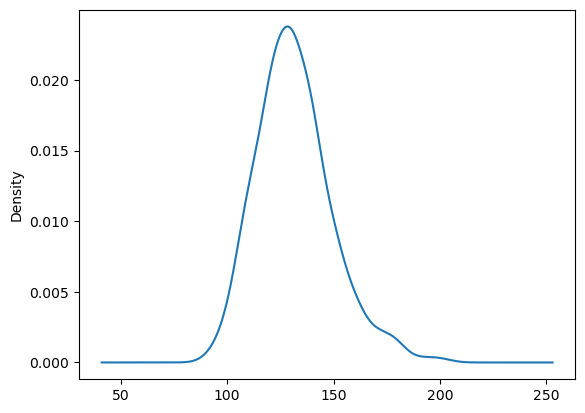

In [77]:
df[cont[1]].plot(kind='kde')

<Axes: ylabel='Density'>

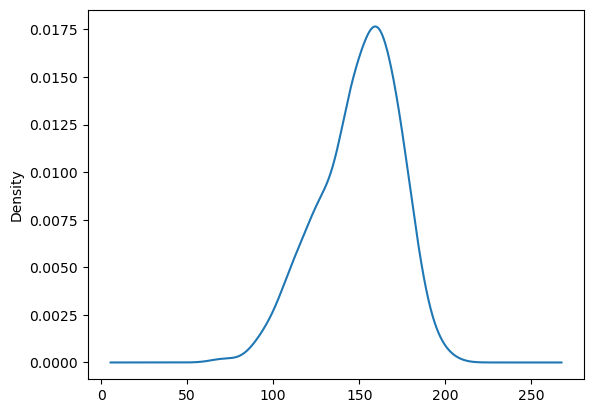

In [78]:
df[cont[2]].plot(kind='kde')

<Axes: ylabel='Density'>

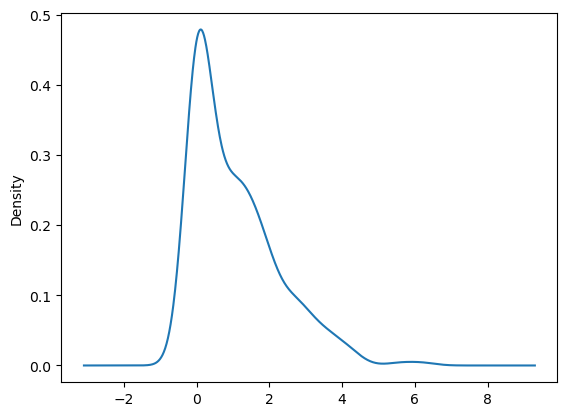

In [79]:
df[cont[3]].plot(kind='kde')

In [80]:
# find variance or skewness in the continuous variable

print("Skewness: %f" % df['trestbps'].skew())
print("Skewness: %f" % df['thalach'].skew())
print("Skewness: %f" % df['oldpeak'].skew())
print("Skewness: %f" % df['age'].skew())

Skewness: 0.716541
Skewness: -0.532671
Skewness: 1.266173
Skewness: -0.203743


In [81]:
# splitting the dataset into features/target as well as train/test
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [97]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [98]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((241, 13), (241,), (61, 13), (61,))

In [88]:
# Model Building
# it is a classification problem, so we need to use classification algorithms

In [95]:
np.array(x_train)

array([[42.,  1.,  1., ...,  2.,  0.,  2.],
       [68.,  1.,  2., ...,  1.,  0.,  3.],
       [67.,  1.,  0., ...,  1.,  2.,  3.],
       ...,
       [69.,  1.,  3., ...,  1.,  1.,  2.],
       [61.,  1.,  3., ...,  1.,  2.,  2.],
       [63.,  0.,  1., ...,  2.,  2.,  2.]])

In [227]:
from sklearn.metrics import accuracy_score,r2_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pickle
import joblib

In [228]:
# 1. KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(np.array(x_train),np.array(y_train))

KNeighborsClassifier()

In [229]:
accuracy_score(knn.predict(x_test),y_test)

0.9180327868852459

In [230]:
x_train.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [231]:
# to increase the accuracy we can do cross validation and hyperparameter tuning
# first do standard scaling, then do the above steps


In [232]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [233]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((241, 13), (61, 13), (241,), (61,))

In [234]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(np.array(x_train),np.array(y_train))

KNeighborsClassifier()

In [235]:
accuracy_score(knn.predict(x_test),y_test)
# 91 percent accuracy after standard scaling

0.9180327868852459

In [236]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#use k-fold CV to evaluate model
scores = cross_val_score(knn, x_train, y_train, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print(np.max(scores))

0.9166666666666666


In [237]:
# Hyperparameter tuning
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
params = {
    'n_neighbors':[3,5,7,9,10],
    'weights':['uniform','distance'],
    'algorithm':['ball_tree','brute'],
    'p':[1,2]
}

gcv = GridSearchCV(knn,param_grid=params,cv=kfold,scoring='accuracy',verbose=2,refit=True)

In [238]:
np.array(y_train).reshape(y_train.shape[0])

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
      dtype=int64)

In [239]:
gcv.fit(x_train,np.array(y_train).reshape(y_train.shape[0],))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=2, weights=uniform; total 

[CV] END algorithm=brute, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END 

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [240]:
gcv.best_score_

0.8344387755102041

In [241]:
acc_models = {}

acc_models['KNN'] = accuracy_score(knn.predict(x_test),y_test)

In [242]:
joblib.dump(knn,'../models/knn.pkl')

['../models/knn.pkl']

### 2.LOGISTIC REGRESSION

In [243]:
model1 = LogisticRegression(random_state=1) 
model1.fit(x_train, y_train) 

y_pred1 = model1.predict(x_test) 
accuracy_score(y_pred1,y_test)

0.819672131147541

In [244]:
acc_models['LR'] = accuracy_score(y_pred1,y_test)

In [245]:
joblib.dump(model1,'../models/LR.pkl')

['../models/LR.pkl']

### 3. SVC

In [246]:
model3 = SVC(random_state=1) 
model3.fit(x_train, y_train) 

y_pred3 = model3.predict(x_test) 
#print(classification_report(y_test, y_pred3))
accuracy_score(y_pred3,y_test)

0.8688524590163934

In [247]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#use k-fold CV to evaluate model
scores = cross_val_score(model3, x_train, y_train, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print(np.mean(scores))

0.8173333333333334


In [248]:

acc_models['SVC'] = accuracy_score(model3.predict(x_test),y_test)

In [249]:
joblib.dump(model1,'../models/SVC.pkl')

['../models/SVC.pkl']

### 4.DT

In [250]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [251]:
accuracy_score(dt.predict(x_test),y_test)

0.8032786885245902

In [252]:
# Hyperparameter tuning Decision Tree
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
params = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10]
}

gcv = GridSearchCV(dt,param_grid=params,cv=kfold,scoring='accuracy',verbose=2,refit=True)

In [253]:
gcv.fit(x_train,np.array(y_train).reshape(y_train.shape[0]))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..................max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.0s
[CV] END .................max_depth=10, min_samples_split=10; total time=   0.0s
[CV] END .................max_depth=10, min_samp

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [254]:
gcv.best_estimator_

DecisionTreeClassifier(max_depth=40)

In [255]:
dt1 = DecisionTreeClassifier(max_depth=30,min_samples_split=5)
dt1.fit(x_train,y_train)
accuracy_score(dt1.predict(x_test),y_test)

0.7868852459016393

In [258]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#use k-fold CV to evaluate model
scores = cross_val_score(model3, x_train, y_train, scoring='accuracy',
                         cv=cv, n_jobs=-1)

acc_models['DT'] = np.mean(scores) 

In [267]:
joblib.dump(dt,'../models/DT.pkl')

['../models/DT.pkl']

In [259]:
acc_models

{'KNN': 0.9180327868852459,
 'LR': 0.819672131147541,
 'SVC': 0.8688524590163934,
 'DT': 0.8173333333333334}

### 5.Random Forest

In [260]:

model5 = RandomForestClassifier()
model5.fit(x_train, y_train) 

y_pred5 = model5.predict(x_test)
print(accuracy_score(y_pred5,y_test)) 

0.8688524590163934


In [261]:
# Hyperparameter tuning RF
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2']
}

gcv = GridSearchCV(model5,param_grid=params,cv=kfold,scoring='accuracy',verbose=2,refit=True)

gcv.fit(x_train,np.array(y_train).reshape(y_train.shape[0]))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .max_depth=None, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END .max_depth=None, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END .max_depth=None, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END .max_depth=None, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END .max_depth=None, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, n_e

[CV] END ...max_depth=20, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=20, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=20, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=20, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.6s
[CV] END ..max_depth=20, max

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\KIIT\anaconda3\lib\site-packages\skle

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [264]:
acc_models['RF'] = gcv.best_score_

In [263]:
# the best score 
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#use k-fold CV to evaluate model
scores = cross_val_score(model5, x_train, y_train, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print(np.mean(scores))

0.805


In [265]:
acc_models

{'KNN': 0.9180327868852459,
 'LR': 0.819672131147541,
 'SVC': 0.8688524590163934,
 'DT': 0.8173333333333334,
 'RF': 0.81343537414966}

In [266]:
joblib.dump(model5,'../models/RF.pkl')

['../models/RF.pkl']

### Artificial Neural Network

In [268]:
pip install tensorflow

### Artificial Neural Network

In [272]:
import tensorflow as tf
import tensorflow.keras

In [273]:
model6 = tf.keras.models.Sequential()
model6.add(tf.keras.layers.Dense(12,activation='relu',input_dim=13))
model6.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model6.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [274]:
model6.fit(x_train,y_train,epochs=300)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4754 - loss: 0.8060
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4587 - loss: 0.8030 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5164 - loss: 0.7607 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5631 - loss: 0.7255
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5758 - loss: 0.7062 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5979 - loss: 0.6703 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6121 - loss: 0.6588 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6409 - loss: 0.6145 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6463 - loss: 0.6079 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7022 - loss: 0.5870 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7456 - loss: 0.5522 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7463 - loss

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8584 - loss: 0.3442 
Epoch 70/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8517 - loss: 0.3310 
Epoch 71/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8665 - loss: 0.3259 
Epoch 72/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8779 - loss: 0.3059 
Epoch 73/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9030 - loss: 0.2898 
Epoch 74/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8733 - loss: 0.3120 
Epoch 75/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8739 - loss: 0.3266  
Epoch 76/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8823 - loss: 0.3169
Epoch 77/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8695 - loss: 0.3405  
Epoch 78/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9040 - loss: 0.3035 
Epoch 79/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8810 - loss: 0.3196  
Epoch 80/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8839 - loss:

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9135 - loss: 0.2295 
Epoch 138/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9011 - loss: 0.2475 
Epoch 139/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8843 - loss: 0.2653 
Epoch 140/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8970 - loss: 0.2548 
Epoch 141/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8966 - loss: 0.2700  
Epoch 142/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9215 - loss: 0.2288 
Epoch 143/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8890 - loss: 0.2425 
Epoch 144/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9068 - loss: 0.2367 
Epoch 145/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8833 - loss: 0.2777 
Epoch 146/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8969 - loss: 0.2516 
Epoch 147/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8922 - loss: 0.2533 
Epoch 148/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.91

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9242 - loss: 0.2206 
Epoch 206/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9196 - loss: 0.2423 
Epoch 207/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9215 - loss: 0.2268 
Epoch 208/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9237 - loss: 0.2196 
Epoch 209/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9302 - loss: 0.2039 
Epoch 210/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9207 - loss: 0.2265 
Epoch 211/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9258 - loss: 0.2225 
Epoch 212/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9150 - loss: 0.2368 
Epoch 213/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9249 - loss: 0.2189  
Epoch 214/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9175 - loss: 0.2096 
Epoch 215/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9278 - loss: 0.2119 
Epoch 216/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.94

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9266 - loss: 0.1946 
Epoch 274/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9346 - loss: 0.1892 
Epoch 275/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9429 - loss: 0.1755  
Epoch 276/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9537 - loss: 0.1653 
Epoch 277/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9557 - loss: 0.1768 
Epoch 278/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9253 - loss: 0.2011 
Epoch 279/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9553 - loss: 0.1682 
Epoch 280/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9468 - loss: 0.1583 
Epoch 281/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9195 - loss: 0.2077 
Epoch 282/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9372 - loss: 0.1943 
Epoch 283/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9449 - loss: 0.1745 
Epoch 284/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.93

In [277]:
y_pred6 = model6.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


In [278]:
print(accuracy_score(y_test, y_pred6.round())) 

0.8688524590163934


In [279]:
acc_models['ANN']=accuracy_score(y_test, y_pred6.round())

In [282]:
acc_models

{'KNN': 0.9180327868852459,
 'LR': 0.819672131147541,
 'SVC': 0.8688524590163934,
 'DT': 0.8173333333333334,
 'RF': 0.81343537414966,
 'ANN': 0.8688524590163934}